reference:

* http://learningjulia.com/2017/02/20/getting-started-with-images.html

In [1]:
using Images, TestImages, Colors # load image


In [2]:
using Random, Distributions # normal etc

In [3]:
using Plots # basic plot

In [4]:
using ImageFiltering

In [5]:
using Random, Distributions

In [6]:
using Printf

In [7]:
#using ImageView # imshow

In [8]:
#img = testimage("lighthouse")


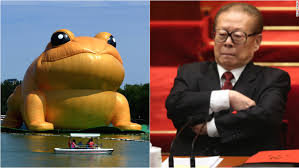

In [9]:
img = load("toad_and_jiang.jpg") # require package `ImageMagick`, 
#related to some shit problems: https://github.com/JuliaIO/ImageMagick.jl/issues/133

In [10]:
img[1,1,1]

In [11]:
summary(img)

"168×299 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}"

In [12]:
c = img[10];

In [13]:
println(c.r, " ", c.g, " ", c.b);
println(red(c), " ", green(c), " ", blue(c));


0.651N0f8 0.765N0f8 0.882N0f8
0.651N0f8 0.765N0f8 0.882N0f8


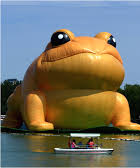

In [14]:
simg = img[1:size(img,1),1:140]

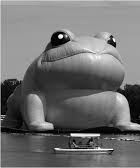

In [15]:
toad = Gray.(simg)

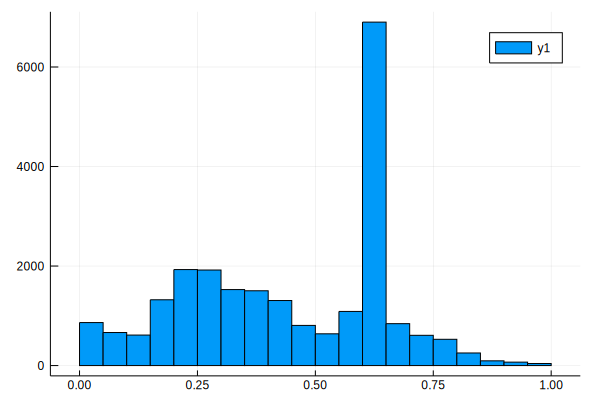

In [16]:
histogram(vec(convert(Array{Float64}, toad)))

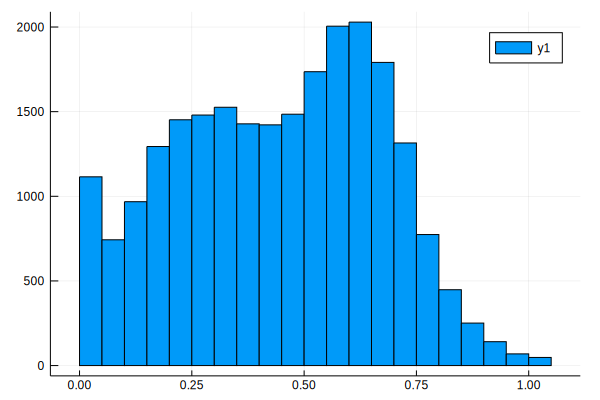

In [17]:
toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,25/255), size(toad))), 0.0, 1.0)
histogram(vec(toad_noised))

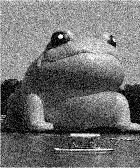

In [17]:
Gray.(toad_noised)

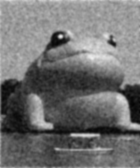

In [18]:
imfilter(Gray.(toad_noised), Kernel.gaussian(1))

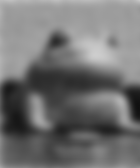

In [19]:
imfilter(Gray.(toad_noised), Kernel.gaussian(4))

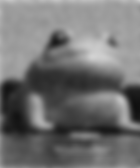

In [20]:
imfilter(Gray.(toad_noised), Kernel.gaussian(3))

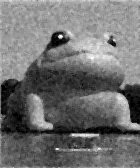

In [21]:
Gray.(mapwindow(median, toad_noised, (3,3))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

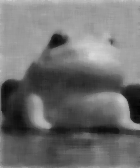

In [22]:
Gray.(mapwindow(median, toad_noised, (9,9))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

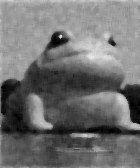

In [23]:
Gray.(mapwindow(median, toad_noised, (5,5))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

In [25]:
ii = [i for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
jj = [j for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
# simulate ngrid/meshgrid since julia reject to expose this function as a independent one: 
# https://github.com/JuliaAttic/Examples/blob/master/ndgrid.jl
#iijj = cat(ii,jj,dims=3) # interesting, julia use `cat` as numpy.stack and numpy.concatenate 
iijj = cat(reshape(ii,1,size(ii,1),size(ii,2)),reshape(jj,1,size(jj,1),size(jj,2)),dims=1)
size(iijj)

(2, 168, 140)

In [26]:
IJ = reshape(iijj, 2, size(iijj,2)*size(iijj,3))
size(IJ)

(2, 23520)

In [27]:
IJ

2×23520 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  …  162  163  164  165  166  167  168
 1  1  1  1  1  1  1  1  1   1   1   1     140  140  140  140  140  140  140

In [28]:
IJ[1:5,:],IJ[1995:2000,:]

BoundsError: BoundsError: attempt to access 2×23520 Array{Int64,2} at index [1:5, Base.Slice(Base.OneTo(23520))]

In [29]:
ij = [50;100]

2-element Array{Int64,1}:
  50
 100

In [30]:
dis = Normal()
K = x->pdf(dis,x)

#7 (generic function with 1 method)

In [31]:
Wx = K.(sum(abs.(ij .- IJ),dims=1))

1×23520 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [32]:
#Gray.(reshape(Wx, size(toad,1), size(toad,2)))

In [33]:
size(Wx)

(1, 23520)

In [34]:
_X = sum(ij .- IJ, dims=1)

1×23520 Array{Int64,2}:
 148  147  146  145  144  143  142  …  -153  -154  -155  -156  -157  -158

In [35]:
X = cat(1, _X, dims=1)

2×23520 Array{Int64,2}:
   1    1    1    1    1    1    1  …     1     1     1     1     1     1
 148  147  146  145  144  143  142     -153  -154  -155  -156  -157  -158

In [36]:
Y = reshape(toad_noised, 1, size(toad_noised,1)*size(toad_noised,2))

1×23520 Array{Float64,2}:
 0.772384  0.843184  0.811887  0.831143  …  0.403561  0.452459  0.716473

In [37]:
#a = inv((X .* Wx) @ X) @ (X.T * Wx) @ Y

In [38]:
size(X),size(Wx),size(X)

((2, 23520), (1, 23520), (2, 23520))

In [39]:
a = inv((X .* Wx) * X') * (X .* Wx) * Y'

2×1 Array{Float64,2}:
 0.8426854174136694  
 0.024414033119002355

In [40]:
a[1]/a[2]

34.51643623591941

In [41]:
ones(10,10)

10×10 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [42]:
@time begin

    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1))
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end

end

 76.355506 seconds (1.11 G allocations: 86.705 GiB, 7.24% gc time)


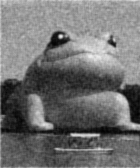

In [43]:
Gray.(mat[1,:,:])

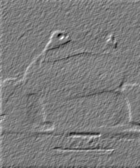

In [44]:
Gray.((mat[2,:,:] .- minimum(mat[2,:,:]))./(maximum(mat[2,:,:])-minimum(mat[2,:,:])))

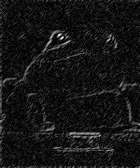

In [45]:
coef = abs.(mat[2,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [46]:
coef

168×140 Array{Float64,2}:
 0.0148747   0.0406556   0.00945292  …  0.0702955   0.0679855    0.0257108 
 0.0625091   0.0673231   0.00591723     0.033577    0.0131235    0.0302782 
 0.0575525   0.00863701  0.0368205      0.0296598   0.0380852    0.00631248
 0.0541169   0.00792173  0.011806       0.0159479   0.0109982    0.00282823
 0.0425809   0.0151677   0.0228925      0.0148393   0.0153708    0.00265514
 0.0429733   0.0778068   0.0274975   …  0.00770591  0.000178103  0.00641589
 0.0308457   0.0340966   0.0558641      0.00550275  0.00249229   0.028478  
 0.00697736  0.0164399   0.0368691      0.0037096   0.0401956    0.0493428 
 0.0385255   0.0262598   0.040489       0.0242316   0.0267898    0.0166393 
 0.0853904   0.051382    0.0445195      0.011594    0.00912308   0.00550799
 0.0403334   0.0244137   0.0293415   …  0.0276722   0.0118608    0.00776179
 0.0153494   0.046771    0.0329901      0.0202441   0.0130106    0.0191669 
 0.0574446   0.069374    0.0094269      0.0170472   0.022378  

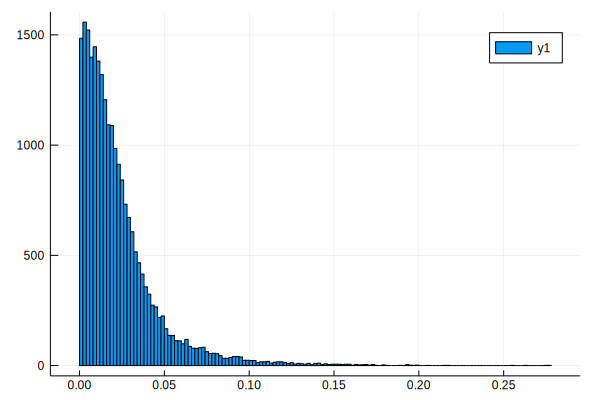

In [47]:
histogram(vec(coef))

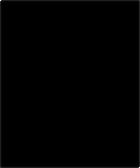

In [48]:
coef = (mat[3,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [49]:
coef

168×140 Array{Float64,2}:
 1.05929   0.393789  0.288843  0.278523  …  0.281281  0.302192  0.390213
 0.393789  0.221231  0.19012   0.186783     0.189079  0.208888  0.302192
 0.288843  0.19012   0.170143  0.167929     0.170053  0.189079  0.281281
 0.278523  0.186783  0.167929  0.165836     0.167926  0.186744  0.278241
 0.278078  0.186636  0.167831  0.165744     0.167831  0.186636  0.278074
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 ⋮                       

In [50]:
#histogram(vec(sqrt.(coef))) # stucked on it, why?

In [51]:
size(vec(coef))

(23520,)

In [52]:
function local_reg(h=1.0)
        
    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1)/h)
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end
    
    return mat
end

local_reg (generic function with 2 methods)

In [53]:
@time mat=local_reg()

 77.319996 seconds (1.66 G allocations: 99.075 GiB, 7.45% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.787776   0.769077   0.755666   …  0.516708  0.560493    0.639034
 0.0148747  0.0625091  0.0575525     0.017772  0.00305833  0.045568
 1.05929    0.393789   0.288843      0.281281  0.302192    0.390213

[:, :, 2] =
 0.743219   0.660247   0.645273    …  0.418472  0.407461   0.509741 
 0.0406556  0.0673231  0.00863701     0.01591   0.0426993  0.0255401
 0.393789   0.221231   0.19012        0.189079  0.208888   0.302192 

[:, :, 3] =
 0.764807     0.67856      0.664786   …   0.385401     0.394755    0.49449  
 0.00945292  -0.00591723  -0.0368205     -0.00453156  -0.0105651  -0.0748154
 0.288843     0.19012      0.170143       0.170053     0.189079    0.281281 

...

[:, :, 138] =
 0.77394    0.649255   0.652222   …  0.388034     0.442661    0.620307
 0.0702955  0.033577  -0.0296598     1.63645e-5  -0.0381609  -0.057574
 0.281281   0.189079   0.170053      0.170143     0.19012     0.288843

[:, :, 139] =
 0.73737     0.649444    0.674283   …  0.388

In [54]:
@time mat2=local_reg(5.0)

 84.376949 seconds (1.66 G allocations: 99.052 GiB, 6.72% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.762179   0.746285    0.732607    0.71856     …  0.45432      0.467133   
 0.0101058  0.00986224  0.00972303  0.00951411     0.00254701  -0.000530823
 0.0890812  0.0646662   0.0480247   0.0366587      0.0158419    0.0177637  

[:, :, 2] =
 0.749948   0.736212   0.722152   0.70711     …   0.43987       0.455325 
 0.0103813  0.0103856  0.0102044  0.00982375     -0.000379816  -0.0033184
 0.0646662  0.0473628  0.0354307  0.0272377       0.0137183     0.0158419

[:, :, 3] =
 0.742871   0.728876   0.714366   0.699556    …   0.432448     0.449341  
 0.010424   0.0104772  0.0103101  0.00999732     -0.00196399  -0.00472599
 0.0480247  0.0354307  0.0267173  0.020745        0.0124312    0.0146967 

...

[:, :, 138] =
 0.694604    0.676531    0.663611    0.654572    …   0.480754     0.491893  
 0.00789439  0.00592382  0.00492813  0.00493441     -0.00248414  -0.00277047
 0.0146967   0.0124312   0.0110389   0.0101339       0.0354307    0.0480247 

[:, :, 139

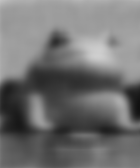

In [55]:
Gray.(mat2[1,:,:])

In [56]:
@time mat3=local_reg(3.0)

 87.132861 seconds (1.66 G allocations: 99.052 GiB, 7.19% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.768197  0.741946   0.726702   …  0.472385    0.477819     0.502357  
 0.01193   0.0107922  0.0104789     0.00836665  0.00552025  -0.00357931
 0.20599   0.124859   0.0814433     0.0365318   0.0397943    0.0468586 

[:, :, 2] =
 0.747655   0.730311   0.71403    …  0.438661     0.45192      0.486121 
 0.0106226  0.0110827  0.011163      0.00110336  -0.00244641  -0.0113729
 0.124859   0.077206   0.0516499     0.0279789    0.0318395    0.0397943

[:, :, 3] =
 0.744505    0.728173   0.710913   0.692134   …   0.443352     0.483117 
 0.00905771  0.010124   0.0106412  0.0113176     -0.00761782  -0.0157908
 0.0814433   0.0516499  0.0359659  0.0277797      0.0279789    0.0365318

...

[:, :, 138] =
 0.723012   0.691194    0.675206    0.668451    …   0.481023     0.518684 
 0.0160677  0.00832348  0.00357637  0.00325809     -0.00827818  -0.0137031
 0.0365318  0.0279789   0.0237545   0.02157         0.0516499    0.0814433

[:, :, 139] =
 0.715628   0.687851

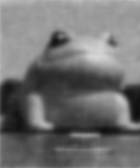

In [57]:
Gray.(mat3[1,:,:])

In [58]:
@time mat4=local_reg(2.0)

 81.419015 seconds (1.66 G allocations: 99.052 GiB, 7.21% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.785322   0.746341   0.726226   …  0.494642   0.501241   0.535342  
 0.0201119  0.0208316  0.0166458     0.013282   0.0146167  0.00139494
 0.381407   0.192457   0.117087      0.0757318  0.0823816  0.101169  

[:, :, 2] =
 0.743734   0.71493    0.696975    …  0.437318    0.450654     0.503635 
 0.0135479  0.0126552  0.00928648     0.00596382  0.00176882  -0.0150004
 0.192457   0.102895   0.0683216      0.0530385   0.0610493    0.0823816

[:, :, 3] =
 0.742951    0.718379    0.699812    …   0.41262      0.440226    0.503812 
 0.00437096  0.00391624  0.00274723     -0.00641244  -0.0123265  -0.0281659
 0.117087    0.0683216   0.049941        0.0443848    0.0530385   0.0757318

...

[:, :, 138] =
 0.738333   0.685579    0.671038    …   0.443833     0.473803    0.554381 
 0.029686   0.0110644  -0.00150145     -0.00303032  -0.020308   -0.0369255
 0.0757318  0.0530385   0.0443848       0.049941     0.0683216   0.117087 

[:, :, 139] =
 0.723231   0.684

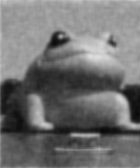

In [59]:
Gray.(mat4[1,:,:])

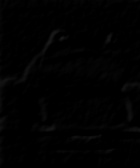

In [60]:
Gray.(mat4[2,:,:])

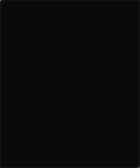

In [61]:
Gray.(mat4[3,:,:])

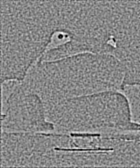

In [34]:
coef = imfilter(Gray.(toad_noised), Kernel.LoG(1))
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

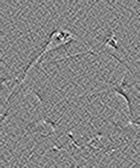

In [38]:
coef = imfilter(Gray.(toad_noised), Kernel.sobel())
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [24]:
Kernel.LoG(1)

OffsetArray(::Array{Float64,2}, -4:4, -4:4) with eltype Float64 with indices -4:4×-4:4:
 5.37316e-7   1.36417e-5  0.000130061  …  1.36417e-5  5.37316e-7 
 1.36417e-5   0.00031426  0.00263208      0.00031426  1.36417e-5 
 0.000130061  0.00263208  0.0174901       0.00263208  0.000130061
 0.000485745  0.00857902  0.0391927       0.00857902  0.000485745
 0.000747467  0.0123764   0.0430786       0.0123764   0.000747467
 0.000485745  0.00857902  0.0391927    …  0.00857902  0.000485745
 0.000130061  0.00263208  0.0174901       0.00263208  0.000130061
 1.36417e-5   0.00031426  0.00263208      0.00031426  1.36417e-5 
 5.37316e-7   1.36417e-5  0.000130061     1.36417e-5  5.37316e-7 

0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0219 & 0.0983 & 0.1621 & 0.0983 & 0.0219 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\


In [26]:
#@time

sigma_noise = 25
simga_imfilter_range = 0.1:0.2:3
T = 200

sigma_loss_list = zeros(length(simga_imfilter_range))
sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    loss_list = zeros(T)
    for t=1:T
        toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0)
        toad_filtered = imfilter(Gray.(toad_noised), Kernel.gaussian(simga_imfilter))
        loss_list[t] = mean((toad_filtered - toad).^2)
    end
    sigma_loss_list[simga_imfilter_idx] = mean(loss_list)
    sigma_loss_std_list[simga_imfilter_idx] = std(loss_list)
end

In [82]:
toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0);

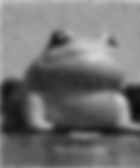

In [28]:
toad_filtered = imfilter(Gray.(toad_noised), Kernel.gaussian(3))

In [29]:
0.1:0.5

0.1:1.0:0.1

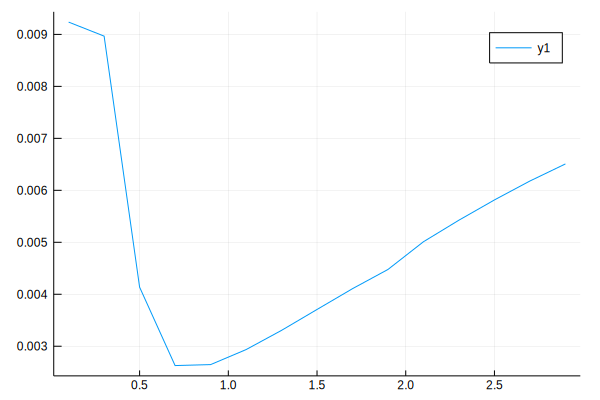

In [30]:
plot(simga_imfilter_range,sigma_loss_list)

In [31]:
savefig("images/crossvalidation1.png")

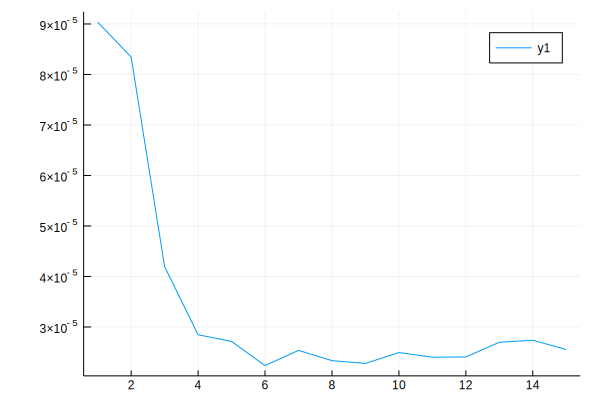

In [32]:
plot(sigma_loss_std_list)

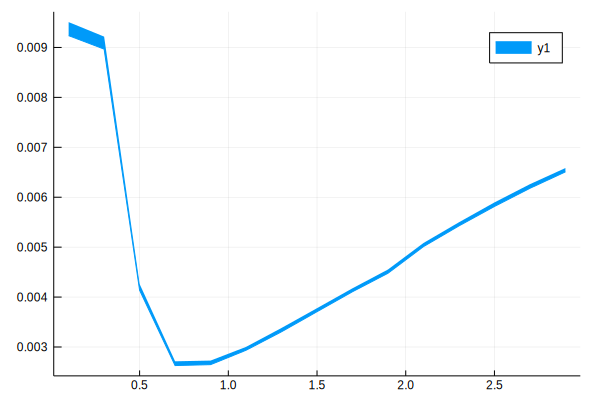

In [34]:
plot(simga_imfilter_range,sigma_loss_list,fillrange=[sigma_loss_list+sigma_loss_std_list.*3,sigma_loss_list-sigma_loss_std_list.*3])

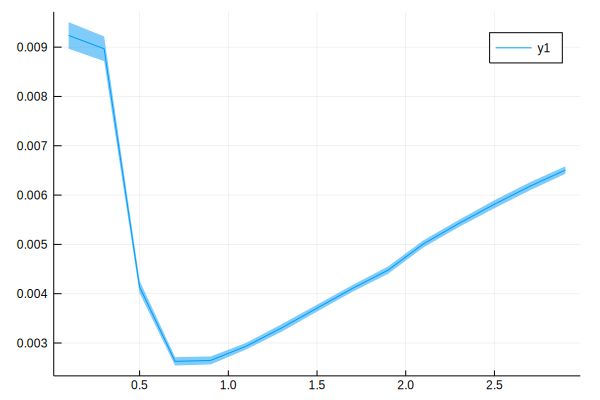

In [35]:
plot(simga_imfilter_range,sigma_loss_list,ribbon=sigma_loss_std_list.*3)

In [36]:
#savefig("images/crossvalidation1.png")

In [60]:
K=Kernel.gaussian(1)
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0219 & 0.0983 & 0.1621 & 0.0983 & 0.0219 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\


In [62]:
K=Kernel.gaussian(1)
K[0,0]=0
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0219 & 0.0983 & 0.0000 & 0.0983 & 0.0219 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\


In [63]:
K=Kernel.gaussian(1)
K[0,0]=0
K = K./sum(K)
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0035 & 0.0159 & 0.0262 & 0.0159 & 0.0035 \\
0.0159 & 0.0712 & 0.1173 & 0.0712 & 0.0159 \\
0.0262 & 0.1173 & 0.0000 & 0.1173 & 0.0262 \\
0.0159 & 0.0712 & 0.1173 & 0.0712 & 0.0159 \\
0.0035 & 0.0159 & 0.0262 & 0.0159 & 0.0035 \\


In [37]:
sigma_noise = 25
simga_imfilter_range = 0.2:0.2:3
T = 200

sigma_loss_list = zeros(length(simga_imfilter_range))
sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    
    K = Kernel.gaussian(simga_imfilter)
    K[0,0]=0
    K = K./sum(K)
    toad_filtered = imfilter(Gray.(toad_noised), K)
    
    #sigma_loss_list[simga_imfilter_idx] = mean((toad_filtered - toad).^2)
    sigma_loss_list[simga_imfilter_idx] = mean((toad_filtered - toad_noised).^2)
end


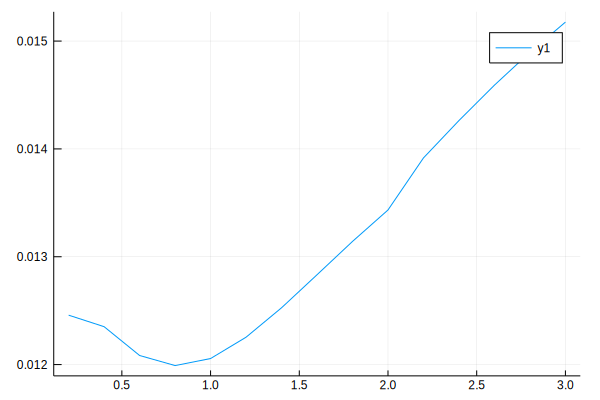

In [38]:
plot(simga_imfilter_range, sigma_loss_list)

In [39]:
#savefig("images/crossvalidation2.png")

In [34]:
sigma_noise = 25
simga_imfilter_range = 0.2:0.2:3
T = 200

sigma_loss_list_534 = zeros(length(simga_imfilter_range))
#sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    
    K = Kernel.gaussian(simga_imfilter)
    #K[0,0]=0
    #K = K./sum(K)
    toad_filtered = imfilter(Gray.(toad_noised), K)
    
    #sigma_loss_list_534[simga_imfilter_idx] = mean(((toad_filtered - toad)./(1-K[0,0])).^2)
    sigma_loss_list_534[simga_imfilter_idx] = mean(((toad_filtered - toad_noised)./(1-K[0,0])).^2)
end


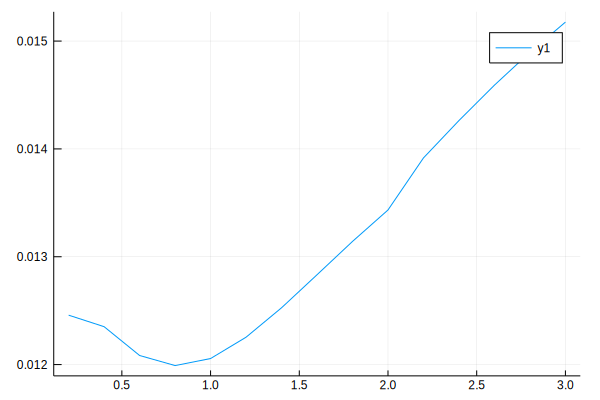

In [35]:
plot(simga_imfilter_range, sigma_loss_list_534)

In [66]:
#savefig("images/crossvalidation2.png")

In [67]:
n = prod(size(toad_noised))

23520

In [68]:
K=Kernel.gaussian(1)
#K[0,0]=0
#K = K./sum(K)

OffsetArray(::Array{Float64,2}, -2:2, -2:2) with eltype Float64 with indices -2:2×-2:2:
 0.00296902  0.0133062  0.0219382  0.0133062  0.00296902
 0.0133062   0.0596343  0.0983203  0.0596343  0.0133062 
 0.0219382   0.0983203  0.162103   0.0983203  0.0219382 
 0.0133062   0.0596343  0.0983203  0.0596343  0.0133062 
 0.00296902  0.0133062  0.0219382  0.0133062  0.00296902

In [69]:
nu = K[0,0] * n
nu_tilde = sum(K.^2) * n

1941.4988016993454

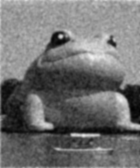

In [70]:
toad_filtered = imfilter(Gray.(toad_noised), K)

In [80]:
println(sum((toad_filtered - toad_noised).^2)/(n-2*nu+nu_tilde))

0.011531644235496148


In [81]:
25/255

0.09803921568627451

In [83]:
sigma_noise

25

In [84]:
sigma_noise/255

0.09803921568627451

In [111]:
particles = 200
est_mat = zeros(4,particles)

for (t,sigma_filter) in enumerate([0.2,0.5,1.0,2.0])
    
    n = prod(size(toad_noised))
    K=Kernel.gaussian(sigma_filter)
    nu = K[0,0] * n
    nu_tilde = sum(K.^2) * n
    
    #est_list = zeros(200)
    for i=1:particles
        toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0)
        toad_filtered = imfilter(Gray.(toad_noised), K)
        est_mat[t,i] = sqrt.(sum((toad_filtered - toad_noised).^2)/(n-2*nu+nu_tilde))
    end
    #histogram(est_list)
end

In [119]:
est_mat

4×200 Array{Float64,2}:
 0.101451  0.100478  0.10064   0.101072  …  0.101902  0.100768  0.101061
 0.101722  0.102482  0.102002  0.10174      0.102306  0.102823  0.102074
 0.107087  0.107654  0.107255  0.107814     0.107402  0.107267  0.107277
 0.116374  0.115827  0.115803  0.115912     0.115853  0.115971  0.11616 

In [120]:
sqrt.(est_mat[1,:])

200-element Array{Float64,1}:
 0.31851366967502676
 0.3169820552775077 
 0.3172379545229935 
 0.3179183884484614 
 0.31842386496806563
 0.3180832104043867 
 0.3166582642213877 
 0.3188788505391991 
 0.3163172724315522 
 0.3184295882344382 
 0.31765289341066705
 0.319765615739505  
 0.3184273341760523 
 ⋮                  
 0.3181690576541474 
 0.31756248115610713
 0.31777310591499996
 0.3176740907289758 
 0.3186074624244662 
 0.31735823342579994
 0.3182104229814844 
 0.3181210492827153 
 0.31833289422432065
 0.3192202539274208 
 0.3174400397081114 
 0.3179007114979659 

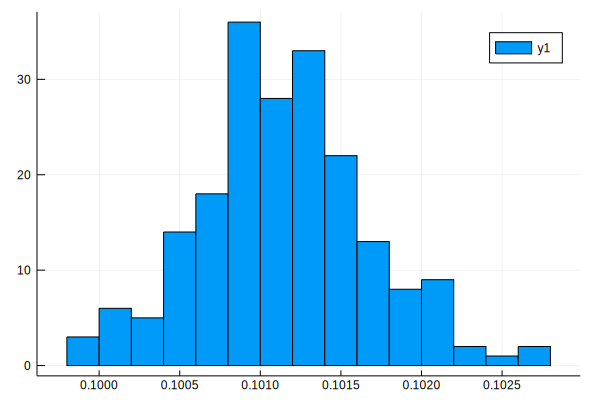

In [121]:
histogram(est_mat[1,:])

In [122]:
#savefig("images/std_est_1.png")

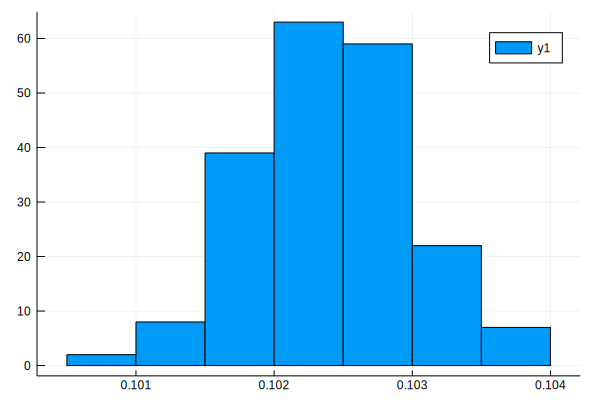

In [123]:
histogram(est_mat[2,:])

In [124]:
#savefig("images/std_est_2.png")

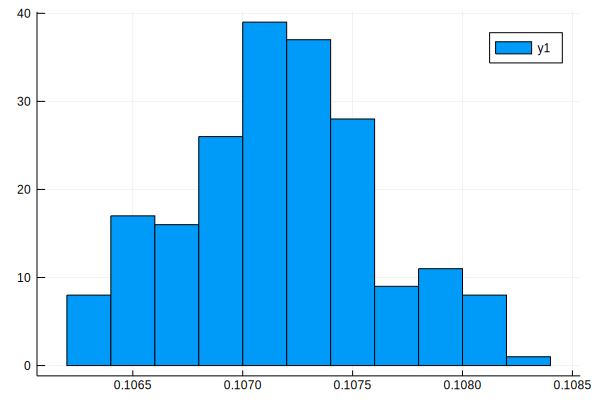

In [125]:
histogram(est_mat[3,:])

In [126]:
#savefig("images/std_est_3.png")

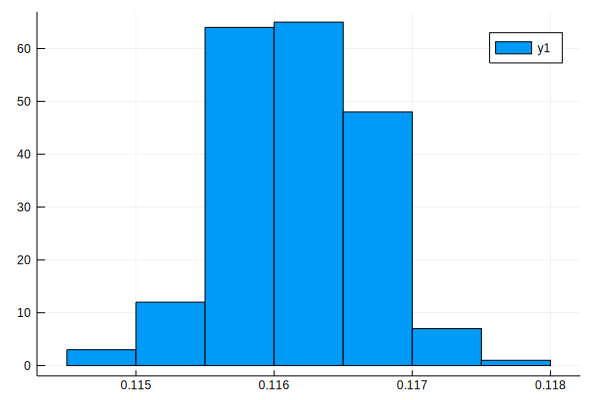

In [127]:
histogram(est_mat[4,:])

In [128]:
#savefig("images/std_est_4.png")

In [129]:
n,-2*nu,nu_tilde

(23520, -1960.7594665914319, 512.332274596755)

In [107]:
sum(Kernel.gaussian(2))

1.0000000000000004